## Importing libraries 

In [53]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchsummary import summary
from tqdm import tqdm

## Downloading the dataset.

In [54]:
# Downloading the MNIST dataset.
train_data = MNIST('mnist', train = True, download=True, transform= ToTensor())
test_data = MNIST('mnist', train= False, download=True, transform= ToTensor())

## Making the train and test set.

In [55]:
x_train = []
y_train = []
for image, label in train_data:
    # print(image.shape)
    x = image.ravel()
    y = label
    x_train.append(x)
    y_train.append(y)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train.shape, y_train.shape

((60000, 784), (60000,))

In [56]:
x_test = []
y_test = []
for image, label in test_data:
    x = image.reshape(-1)
    y = label
    x_test.append(x)
    y_test.append(y)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((10000, 784), (10000,))

## Importing models 

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


## Random Forest implementation.

In [58]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)
RF_predicted = RF_model.predict(x_test)

## Stats of RF based model.

In [59]:
accuracy = accuracy_score(y_test,RF_predicted)
precision = precision_score(y_test,RF_predicted, average="macro")
recall = recall_score(y_test, RF_predicted, average="macro")
f1 = f1_score(y_test,RF_predicted, average="macro")
conf = confusion_matrix(y_test,RF_predicted)

print("Accuracy score of RF", accuracy, end="\n\n")
print("Precision score of RF", precision,  end="\n\n")
print("Recall score of RF",recall,  end="\n\n")
print("F1 score of RF", f1,  end="\n\n")
# print("Confusion matrix of RF\n", conf,  end="\n\n")

Accuracy score of RF 0.9699

Precision score of RF 0.9697089062117918

Recall score of RF 0.9695887276000056

F1 score of RF 0.9696278175496946



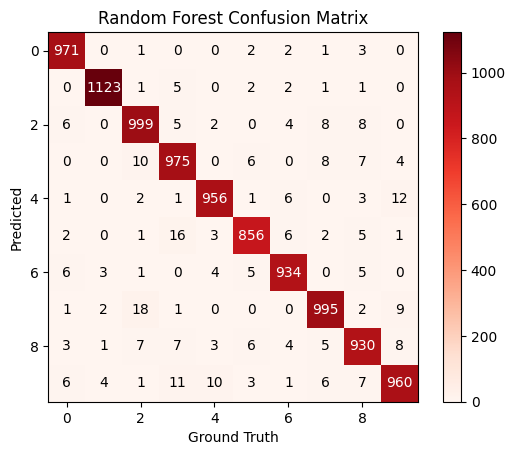

In [60]:
plt.imshow(conf, cmap='Reds', interpolation='nearest')
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        if i==j:
            plt.text(j, i, conf[i, j], ha='center', va='center', color='white')
        else:
            plt.text(j, i, conf[i, j], ha='center', va='center', color='black')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Ground Truth")
plt.ylabel("Predicted")
plt.colorbar()
plt.show()

## Decision Tree implementation.

In [61]:
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train, y_train)
DT_predicted = DT_model.predict(x_test)

## Stats of DT based model.

In [62]:
accuracy = accuracy_score(y_test,DT_predicted)
precision = precision_score(y_test,DT_predicted, average="macro")
recall = recall_score(y_test, DT_predicted, average="macro")
f1 = f1_score(y_test,DT_predicted, average="macro")
conf = confusion_matrix(y_test,DT_predicted)

print("Accuracy score of DT", accuracy, end="\n\n")
print("Precision score of DT", precision,  end="\n\n")
print("Recall score of DT",recall,  end="\n\n")
print("F1 score of DT", f1,  end="\n\n")
# print("Confusion matrix of DT\n", conf,  end="\n\n")

Accuracy score of DT 0.8776

Precision score of DT 0.8761730408292692

Recall score of DT 0.8761034536102876

F1 score of DT 0.8760666313621742



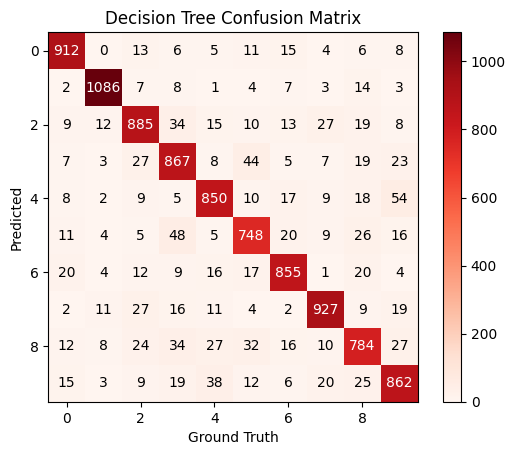

In [63]:
plt.imshow(conf, cmap='Reds', interpolation='nearest')
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        if i==j:
            plt.text(j, i, conf[i, j], ha='center', va='center', color='white')
        else:
            plt.text(j, i, conf[i, j], ha='center', va='center', color='black')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Ground Truth")
plt.ylabel("Predicted")
plt.colorbar()
plt.show()

## Logistic Regression Implementation

In [64]:
Log_reg = LogisticRegression()
Log_reg.fit(x_train, y_train)
LR_predicted = Log_reg.predict(x_test)

/home/tanutiwari/miniconda3/envs/Oasis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Stats for Logistic Regression model.

In [65]:
accuracy = accuracy_score(y_test,LR_predicted)
precision = precision_score(y_test,LR_predicted, average="macro")
recall = recall_score(y_test, LR_predicted, average="macro")
f1 = f1_score(y_test,LR_predicted, average="macro")
conf = confusion_matrix(y_test,LR_predicted)

print("Accuracy score of LR", accuracy, end="\n\n")
print("Precision score of LR", precision,  end="\n\n")
print("Recall score of LR",recall,  end="\n\n")
print("F1 score of LR", f1,  end="\n\n")
# print("Confusion matrix of LR\n", conf,  end="\n\n")

Accuracy score of LR 0.9256

Precision score of LR 0.9247087190360826

Recall score of LR 0.9245122318683123

F1 score of LR 0.9245116077820696



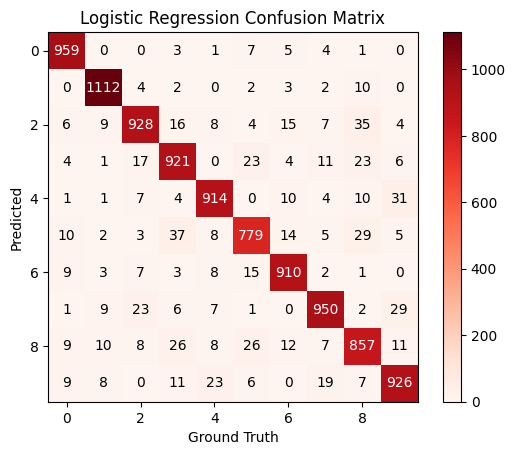

In [66]:
plt.imshow(conf, cmap='Reds', interpolation='nearest')
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        if i==j:
            plt.text(j, i, conf[i, j], ha='center', va='center', color='white')
        else:
            plt.text(j, i, conf[i, j], ha='center', va='center', color='black')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Ground Truth")
plt.ylabel("Predicted")
plt.colorbar()
plt.show()

## Results Comparison

| Model                | Accuracy Score | Precision Score | Recall Score | F1 Score |
|----------------------|----------------|-----------------|--------------|----------|
| Random Forest        | 0.9710         | 0.9700          | 0.9707       | 0.9708   |
| Decision Tree        | 0.8741         | 0.8726          | 0.8725       | 0.8725   |
| Logistic Regression  | 0.9256         | 0.9247          | 0.9245       | 0.9245   |